In [2]:
from sklearn.datasets import load_boston
import numpy as np
boston = load_boston()
boston_X = boston.data
boston_y = boston.target
train_set = np.random.choice([True, False], len(boston_y),p=[.75, .25])

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor()
gpr

GaussianProcessRegressor()

In [5]:
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,kernel=None,n_restarts_optimizer=0, normalize_y=False,optimizer='fmin_l_bfgs_b', random_state=None)

GaussianProcessRegressor()

In [7]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK
mixed_kernel = kernel = CK(1.0, (1e-4, 1e4)) * RBF(10, (1e-4, 1e4))

In [9]:
gpr = GaussianProcessRegressor(alpha=5,n_restarts_optimizer=20,kernel = mixed_kernel)
gpr.fit(boston_X[train_set],boston_y[train_set])

/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=5, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=20)

In [10]:
test_preds = gpr.predict(boston_X[~train_set])

Text(0.5, 1.0, 'Histogram of Residuals')

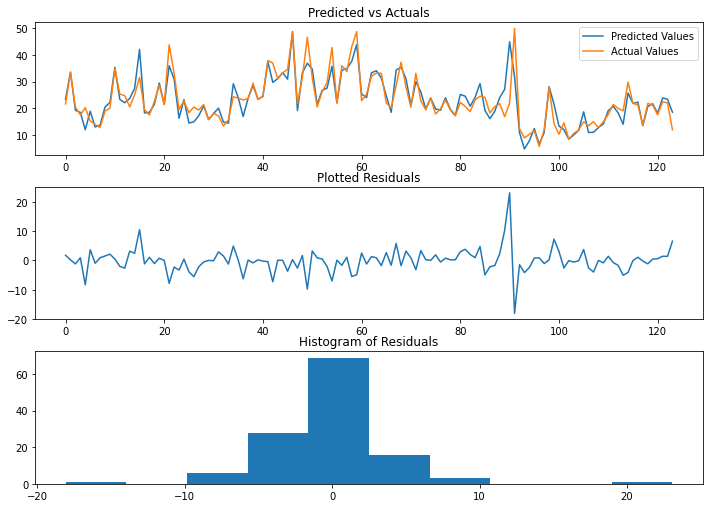

In [12]:
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()
ax[0].plot(range(len(test_preds)), test_preds,label='Predicted Values');
ax[0].plot(range(len(test_preds)),boston_y[~train_set],label='Actual Values');
ax[0].set_title("Predicted vs Actuals")
ax[0].legend(loc='best')
ax[1].plot(range(len(test_preds)),test_preds - boston_y[~train_set]);
ax[1].set_title("Plotted Residuals")
ax[2].hist(test_preds - boston_y[~train_set]);
ax[2].set_title("Histogram of Residuals")

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
gpr5 = GaussianProcessRegressor(alpha=5,n_restarts_optimizer=20,kernel = mixed_kernel)

In [27]:
scores_5 = (cross_val_score(gpr5,boston_X[train_set],boston_y[train_set],cv = 4,scoring = 'neg_mean_absolute_error'))

/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling

In [28]:
def score_mini_report(scores_list):
     print("List of scores: ", scores_list) 
     print("Mean of scores: ", scores_list.mean())
     print("Std of scores: ", scores_list.std())
score_mini_report(scores_5)

List of scores:  [-3.22217939 -6.0882883  -4.23764467 -7.65834484]
Mean of scores:  -5.3016142981056635
Std of scores:  1.7050744638851116


In [18]:
gpr7 = GaussianProcessRegressor(alpha=7,n_restarts_optimizer=20,kernel = mixed_kernel)
scores_7 = (cross_val_score(gpr7,boston_X[train_set],boston_y[train_set],cv = 4,scoring = 'neg_mean_absolute_error'))

/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warning

In [19]:
score_mini_report(scores_7)

List of scores:  [-3.12143439 -5.92939529 -4.16152085 -6.9092619 ]
Mean of scores:  -5.03040311064749
Std of scores:  1.4779559561097868


In [20]:
from sklearn.model_selection import cross_val_score
gpr7n = GaussianProcessRegressor(alpha=7,
                             n_restarts_optimizer=20,
                             kernel = mixed_kernel,
                             normalize_y=True)
scores_7n = (cross_val_score(gpr7n,
                          boston_X[train_set],
                          boston_y[train_set],
                          cv = 4,
                          scoring = 'neg_mean_absolute_error'))
score_mini_report(scores_7n)


List of scores:  [ -5.52816098  -7.37185049  -6.71891737 -10.35167653]
Mean of scores:  -7.492651341919184
Std of scores:  1.7780962078044757


/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [25]:
gpr7n.fit(boston_X[train_set],boston_y[train_set])

test_preds = gpr7n.predict(boston_X[~train_set])

Text(0.5, 1.0, 'Histogram of Residuals')

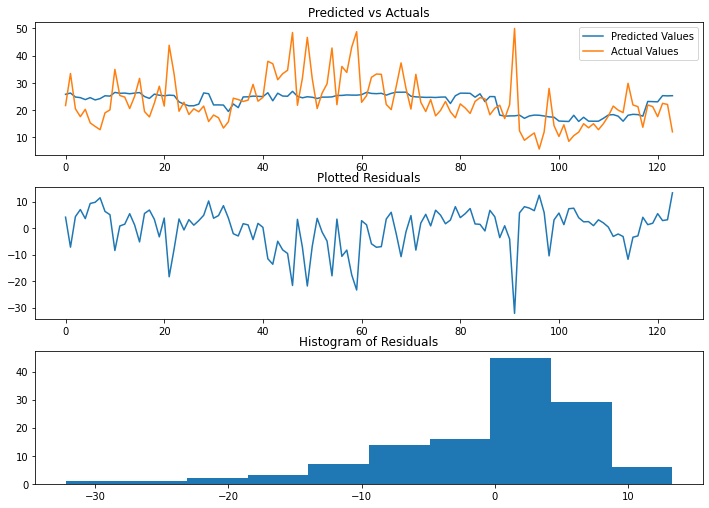

In [26]:
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()
ax[0].plot(range(len(test_preds)), test_preds,label='Predicted Values');
ax[0].plot(range(len(test_preds)),boston_y[~train_set],label='Actual Values');
ax[0].set_title("Predicted vs Actuals")
ax[0].legend(loc='best')
ax[1].plot(range(len(test_preds)),test_preds - boston_y[~train_set]);
ax[1].set_title("Plotted Residuals")
ax[2].hist(test_preds - boston_y[~train_set]);
ax[2].set_title("Histogram of Residuals")

In [ ]:
# the above result is very different from what is shown in the book. I suspect it is because of the warnings in the processes 